<a href="https://colab.research.google.com/github/hkhong72/big_data/blob/main/221026%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data) #정답을 준비
input_data = (input_data - np.pi) / np.pi # -1.0 ~ 1.0 으로 조정
n_data = len(correct_data) #전체데이터갯수 준비

In [ ]:
n_in = 1 #입력
n_mid = 4 #은닉
n_out = 1 #출력층

In [ ]:
wb_width = 0.01 #전체스케일 줄임
eta = 0.1 #학습률
epoch = 2001 #전체에포크, 몇번돌릴것인가, 2000번
interval = 200 #200번에포크돌때마다 정확도하고상태를 찍기위해

In [ ]:
class MiddleLayer: #은닉층
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n) #가중치 파라미터
        self.b = wb_width * np.random.randn( n)
        
    def forward(self, x): # 순전파, 포워드 함수
        self.x = x #일단 저장
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) #시그모이드 
        
    def backward(self, grad_y): #역전파
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): # eta 학습률
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [ ]:
# 출력층 클래스
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)# 가중치(행렬)
        self.b = wb_width * np.random.randn(n)# 편향(벡터)
        
    # 순전파 forward
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b 
        self.y = u# 항등함수
        
    # 역전파 backward
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): # 가중치와 편향 수정
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [ ]:
# 각 층의 초기화 
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

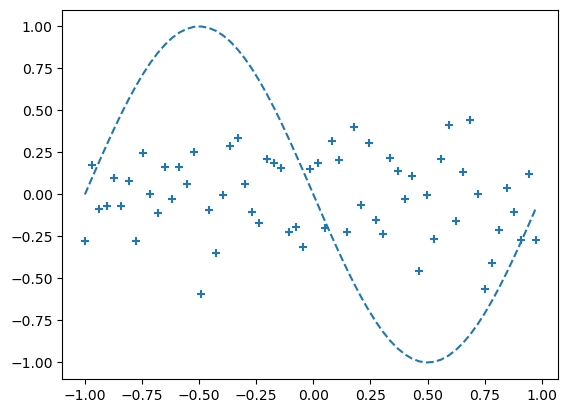

Epoch:0/2001 Error:0.2749574060818094


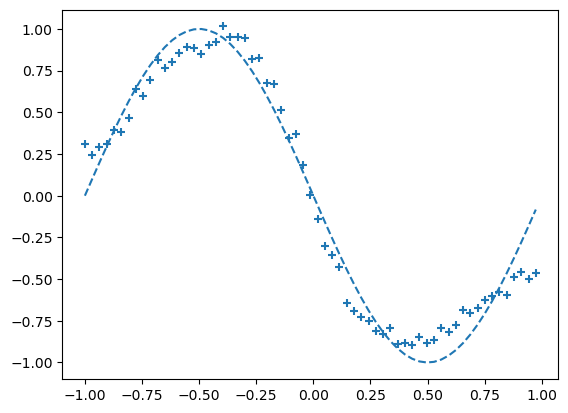

Epoch:200/2001 Error:0.008330196531849757


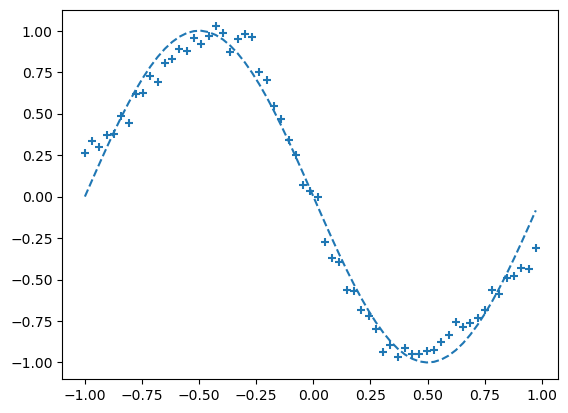

Epoch:400/2001 Error:0.005276344669887196


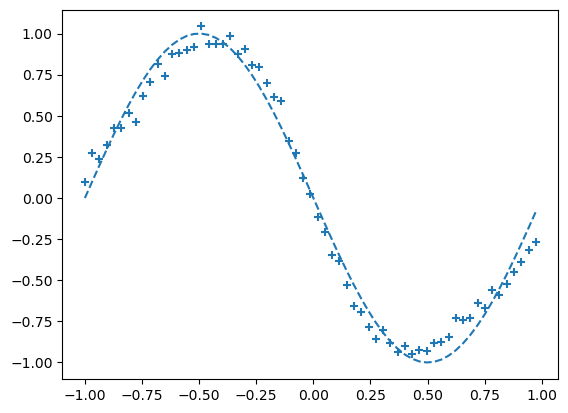

Epoch:600/2001 Error:0.004103794622104126


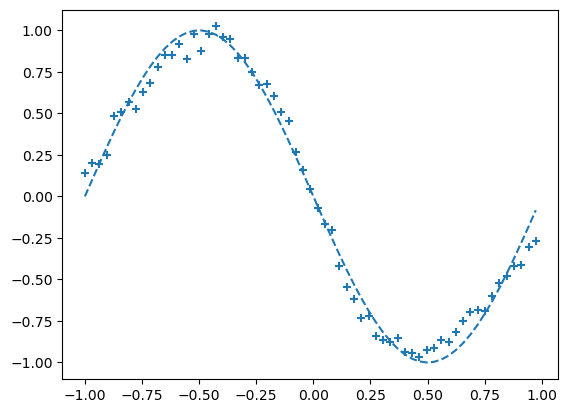

Epoch:800/2001 Error:0.0030782754707228167


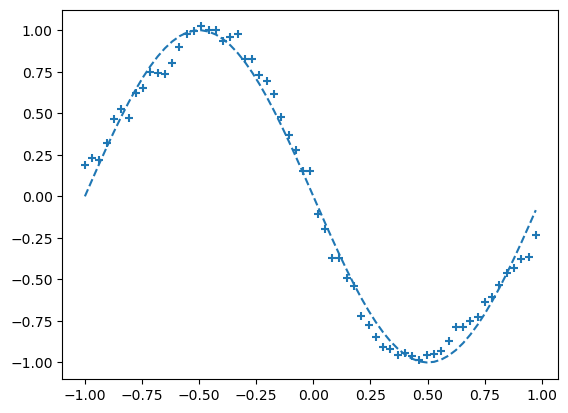

Epoch:1000/2001 Error:0.0030203297796582854


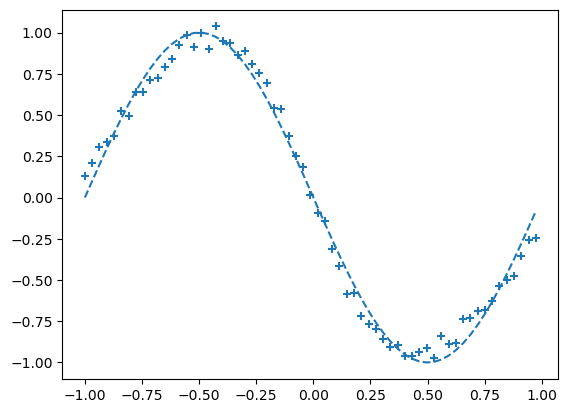

Epoch:1200/2001 Error:0.0027124673405916197


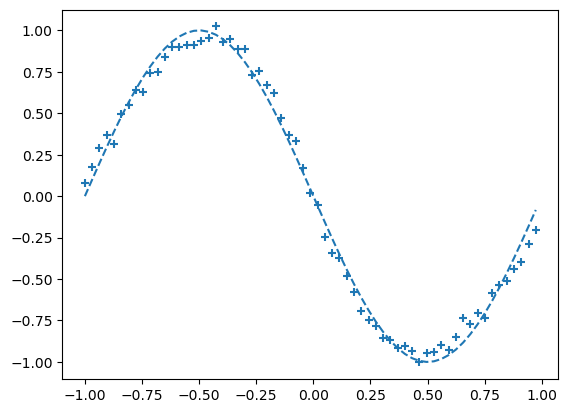

Epoch:1400/2001 Error:0.0020831087431246735


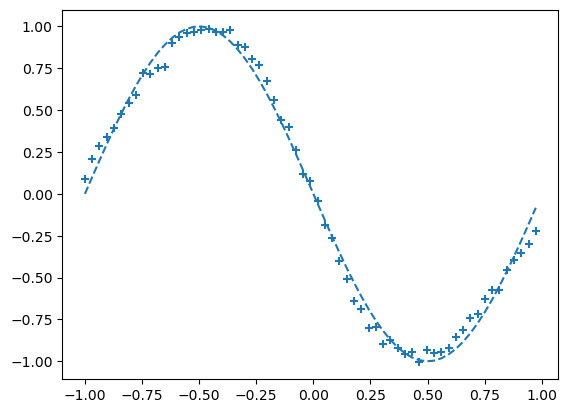

Epoch:1600/2001 Error:0.001814247163415279


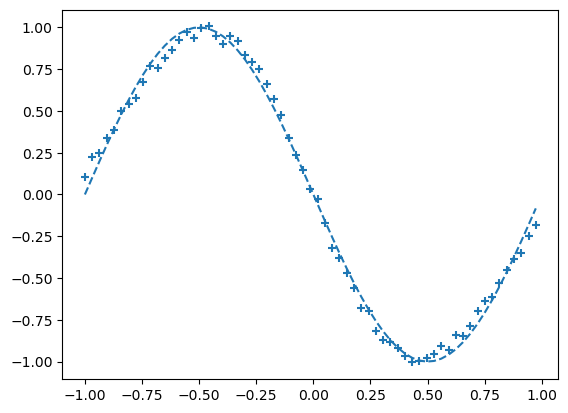

Epoch:1800/2001 Error:0.0012151498202747954


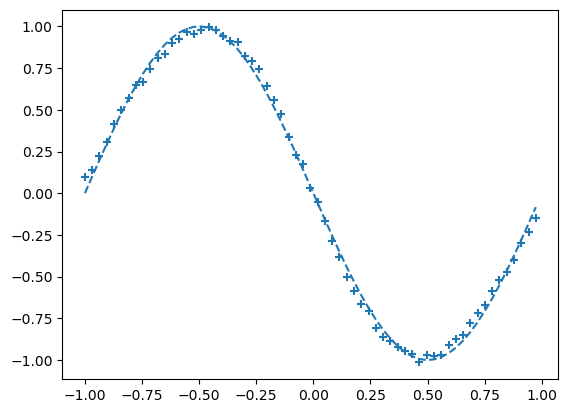

Epoch:2000/2001 Error:0.0006844548342519895


In [ ]:
# -- 학습 --
for i in range(epoch):
# 인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx] # 입력
        t = correct_data[idx] # 정답
        
# 순전파
        middle_layer.forward(x.reshape(1, 1)) # 입력을 행렬로 변환
        output_layer.forward(middle_layer.y) 
        
# 역전파
        output_layer.backward(t.reshape(1, 1)) # 정답을 행렬로 변환
        middle_layer.backward(output_layer.grad_x)

# 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1) # 행렬을 벡터로 되돌림
# 오차계산
            total_error += 1.0/2.0*np.sum(np.square(y - t)) # 오차제곱합
# 출력 기록
            plot_x.append(x)
            plot_y.append(y)
        
    if i % interval == 0:   
    # 출력 그래프 표시
            plt.plot(input_data, correct_data, linestyle="dashed")
            plt.scatter(plot_x, plot_y, marker="+")
            plt.show()

    # 에포크 수와 오차 표시
            print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))